In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime

plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [52]:
df = pd.read_csv("../data/train.csv.zip")
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [54]:
df_train = df.copy()

<span style="font-size:18px;"> we broke **revenue** feature to categorical values to get insights </span>

<Axes: >

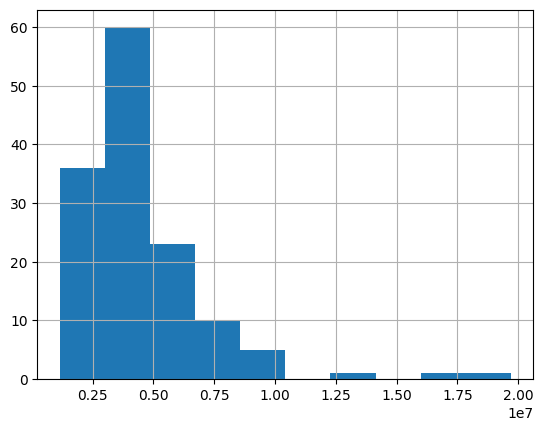

In [55]:
df_train["revenue"].hist()

In [56]:
df_train["cat_revenue"] = pd.cut(df_train["revenue"],
                               bins=[0, 5000000, 10000000, np.inf],
                               labels=["low", "mid", "high"])
df_train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,cat_revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,mid
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,mid
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,low
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,low
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,low


In [57]:
def transform_date(dataframe):
    today = date.today()
    days = []
    for value in dataframe["Open Date"].values:
        casting_date = datetime.strptime(value, "%m/%d/%Y").date()
        delta = today - casting_date
        day = delta.days
        days.append(day)

    dataframe["Open Date"] = pd.Series(days, name="Open Days")
    return dataframe

In [58]:
df_train = transform_date(df_train)
df_train.head()


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,cat_revenue
0,0,8715,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,mid
1,1,5581,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,mid
2,2,3731,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,low
3,3,4132,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,low
4,4,5131,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,low


<Axes: >

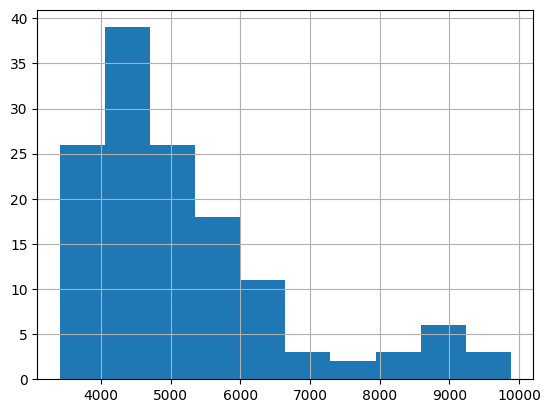

In [37]:
df_train["Open Date"].hist()

<Axes: >

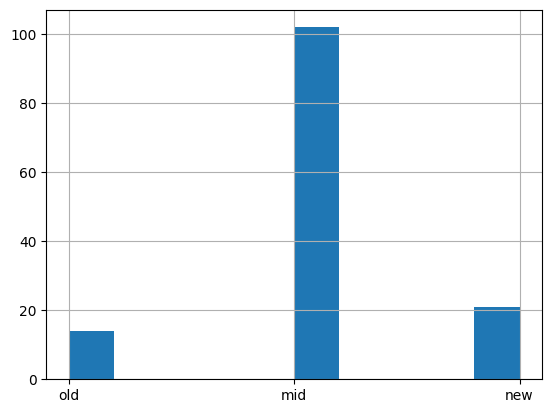

In [48]:
df_train["cat_age"] = pd.cut(df_train["Open Date"],
                           bins=[0, 4000, 7000, np.inf],
                           labels=['new', "mid", "old"])
df_train.head()
df_train["cat_age"].hist()

<span style="font-size:18px;"> using categorical features to visualization and get insights of data. </span>

In [39]:
df_vis = df_train.select_dtypes(exclude=("int64", "float64"))
df_vis.head()

,City,City Group,Type,cat_revenue,cat_age
0,İstanbul,Big Cities,IL,mid,old
1,Ankara,Big Cities,FC,mid,mid
2,Diyarbakır,Other,IL,low,new
3,Tokat,Other,IL,low,mid
4,Gaziantep,Other,IL,low,mid


<Axes: xlabel='City Group', ylabel='count'>

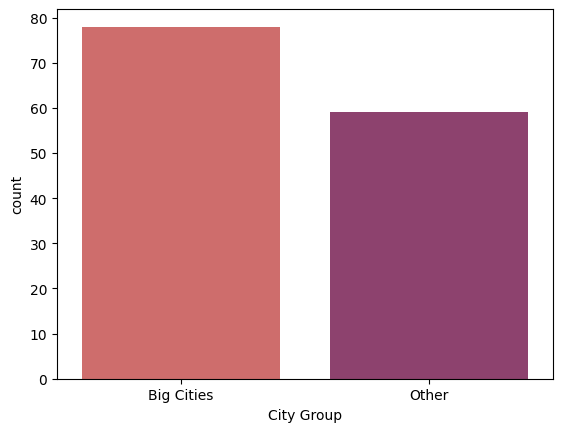

In [63]:
sns.countplot(data=df_vis, x="City Group", palette="flare")

**fig1**

<Axes: xlabel='Type', ylabel='count'>

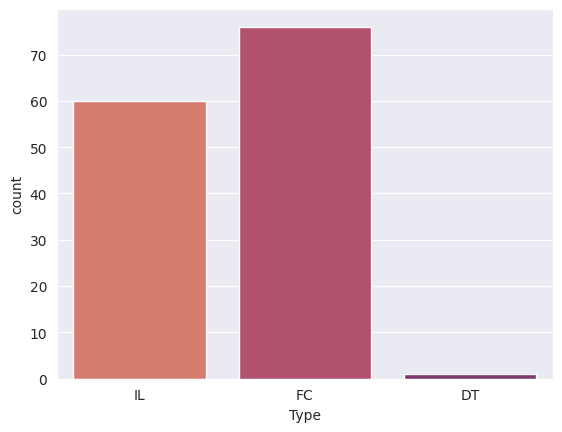

In [ ]:
sns.countplot(data=df_vis, x="Type", palette="flare")

**fig2**

<Axes: xlabel='cat_revenue', ylabel='count'>

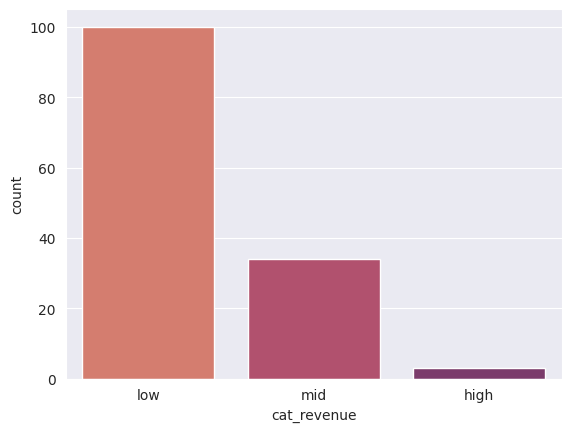

In [ ]:
sns.countplot(data=df_vis, x="cat_revenue", palette="flare")

**fig3**

<Axes: xlabel='cat_age', ylabel='count'>

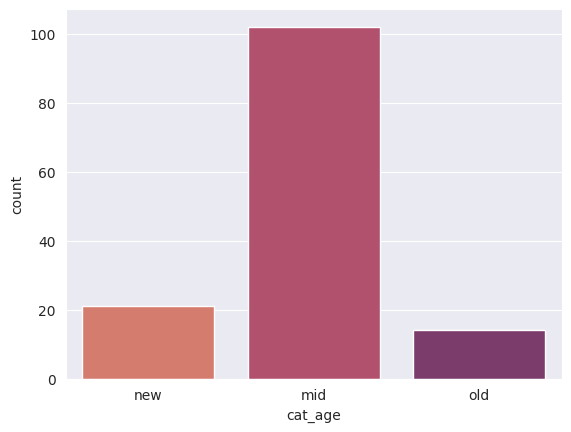

In [ ]:
sns.countplot(data=df_vis, x="cat_age", palette="flare")

**fig4**

<span style="font-size:18px;"> now we try to **analys** the charts. </span>

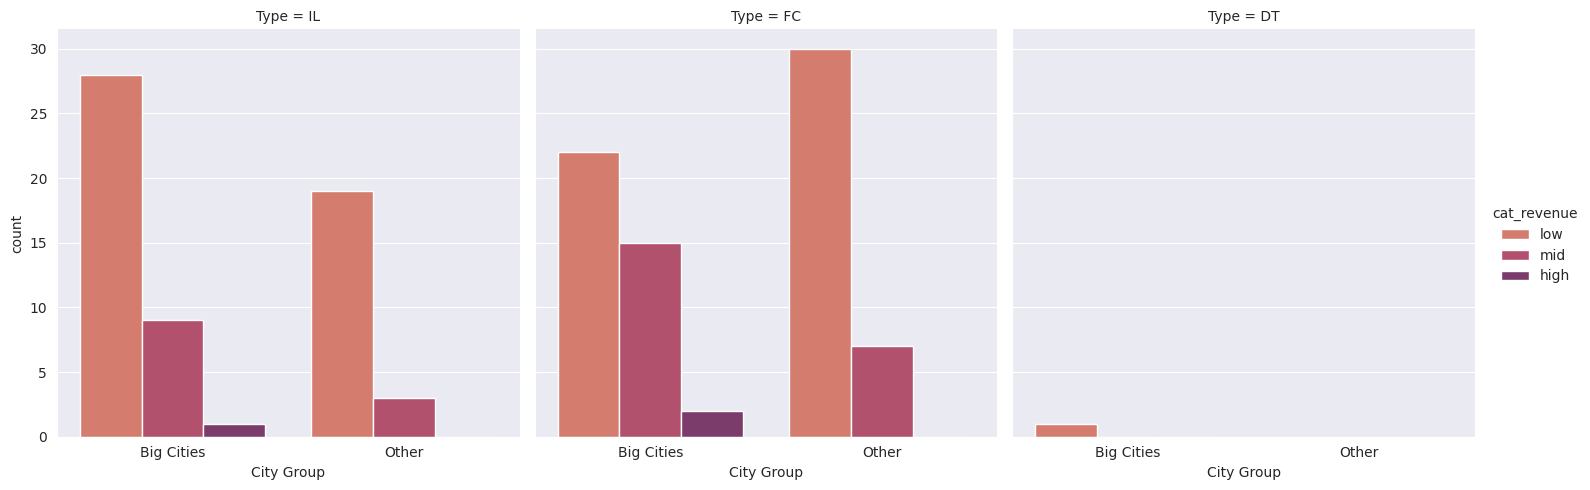

In [ ]:
sns.catplot(data=df_vis, x="City Group", hue="cat_revenue", col="Type", kind="count", palette="flare")

**results:**



* restaurants with high revenue are just in big cities.

* DT restaurants are not good at all.

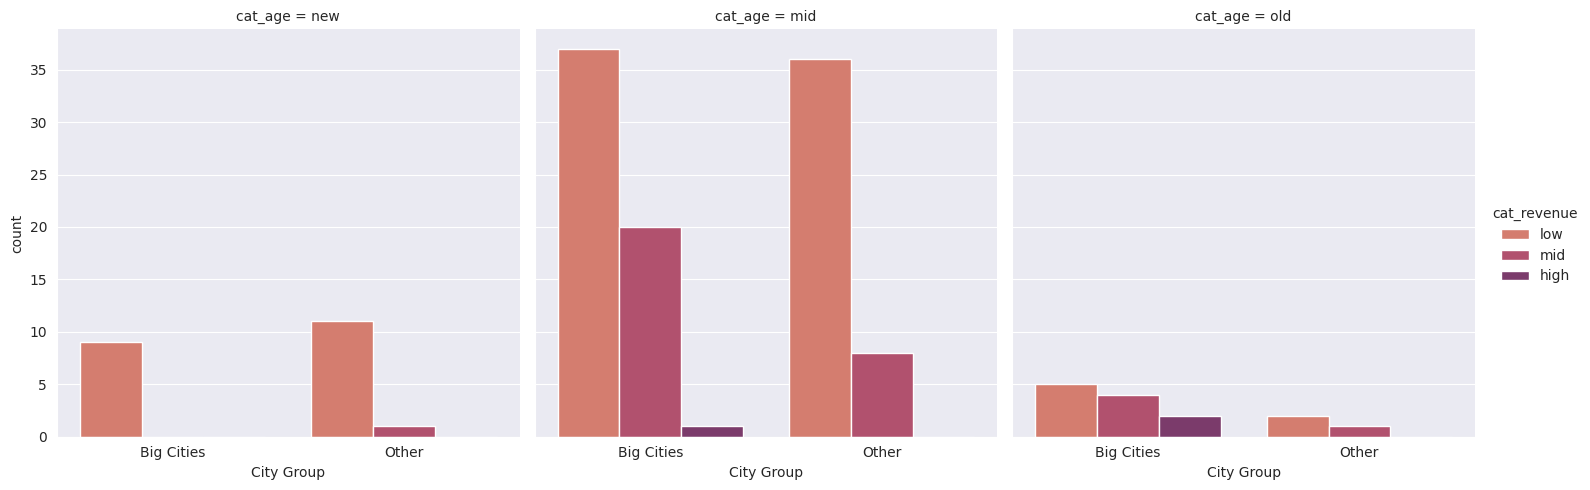

In [ ]:
sns.catplot(data=df_vis, x="City Group", hue="cat_revenue", col="cat_age", kind="count", palette="flare")

**results:** 

* most of restaurants with high revenue are old and in big cities.

* we could say number of restaurants with mid revenue in mid age and young age, almost equal. maybe for new technologies.

* number of restaurants with mid revenue in mid age and young age, almost equal. maybe for new technologies.

* number of new restaurants in big cities is low against other cities. maybe for High construction costs in big cities.

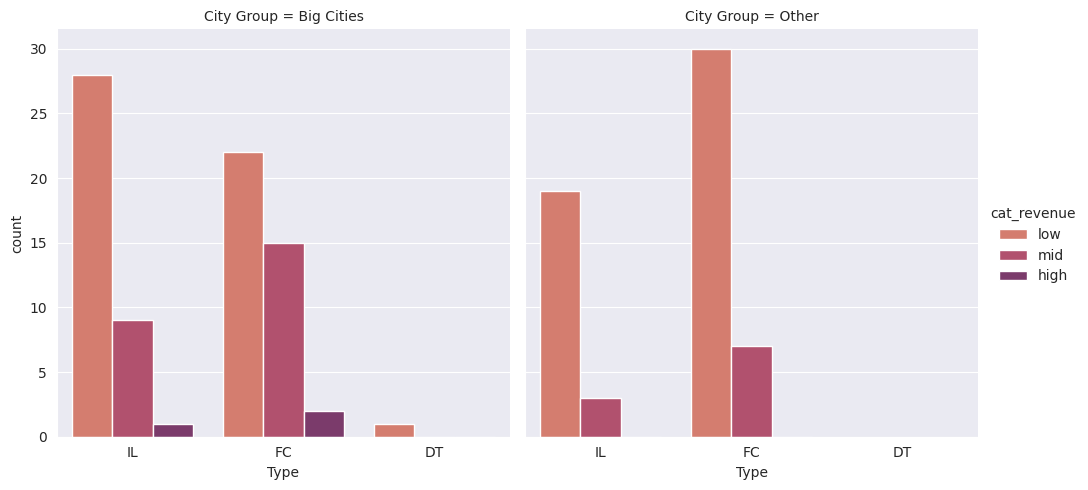

In [ ]:
sns.catplot(data=df_vis, x="Type", hue="cat_revenue", col="City Group", kind="count", palette="flare")

**results:**

* total number of FC restaurant is greater than other types of restaurants.

* in both city groups, FC restaurant have more revenue.

* most of restaurants in other city group, have a low revenue. maybe for little pupulation.

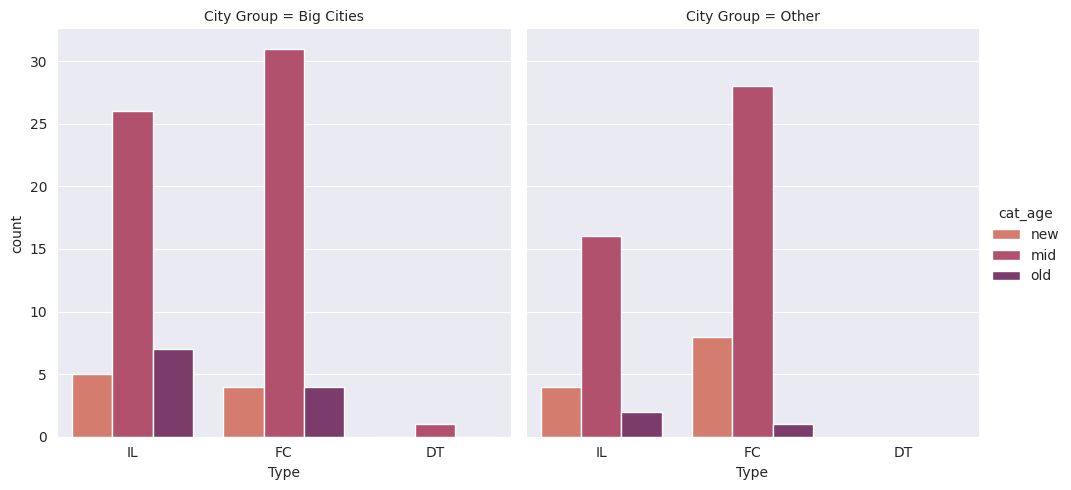

In [ ]:
sns.catplot(data=df_vis, x="Type", hue="cat_age", col="City Group", kind="count", palette="flare")

**results:** 

* most of restaurants have a mid age in total cities.

* number of new FC restaurants in other cities is much larger than another. maybe for low construction costs.


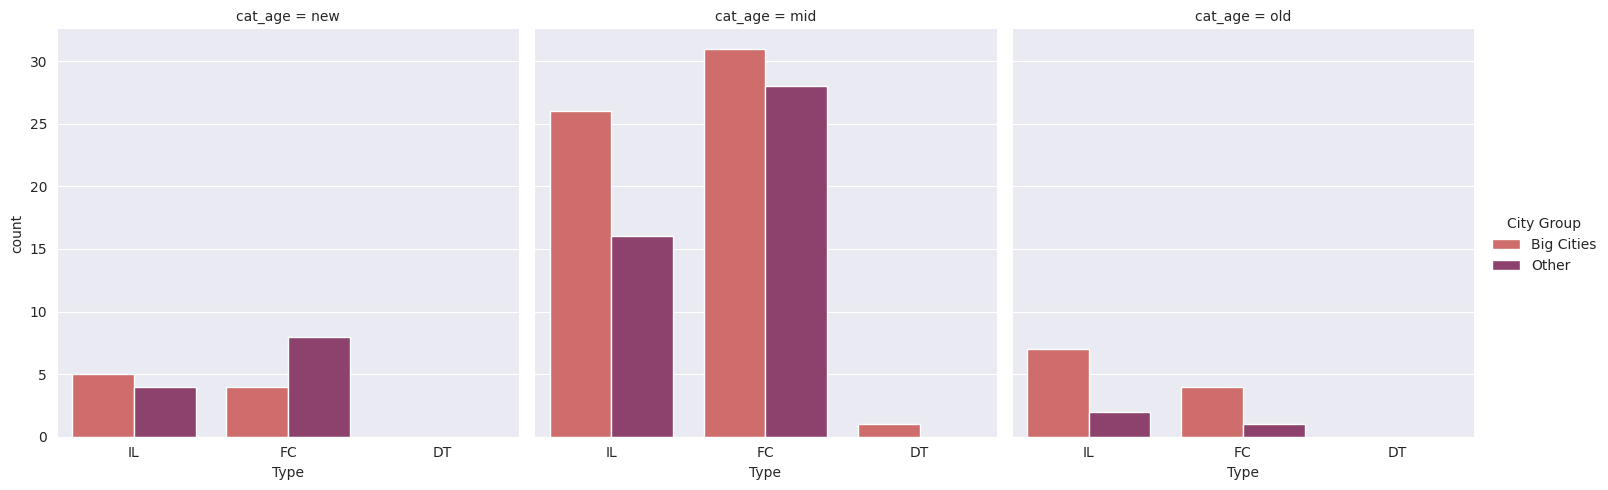

In [ ]:
sns.catplot(data=df_vis, x="Type", hue="City Group", col="cat_age", kind="count", palette="flare")

**results:**

* number of FC restaurants in other city is bigger than big city, which opposite of another types.

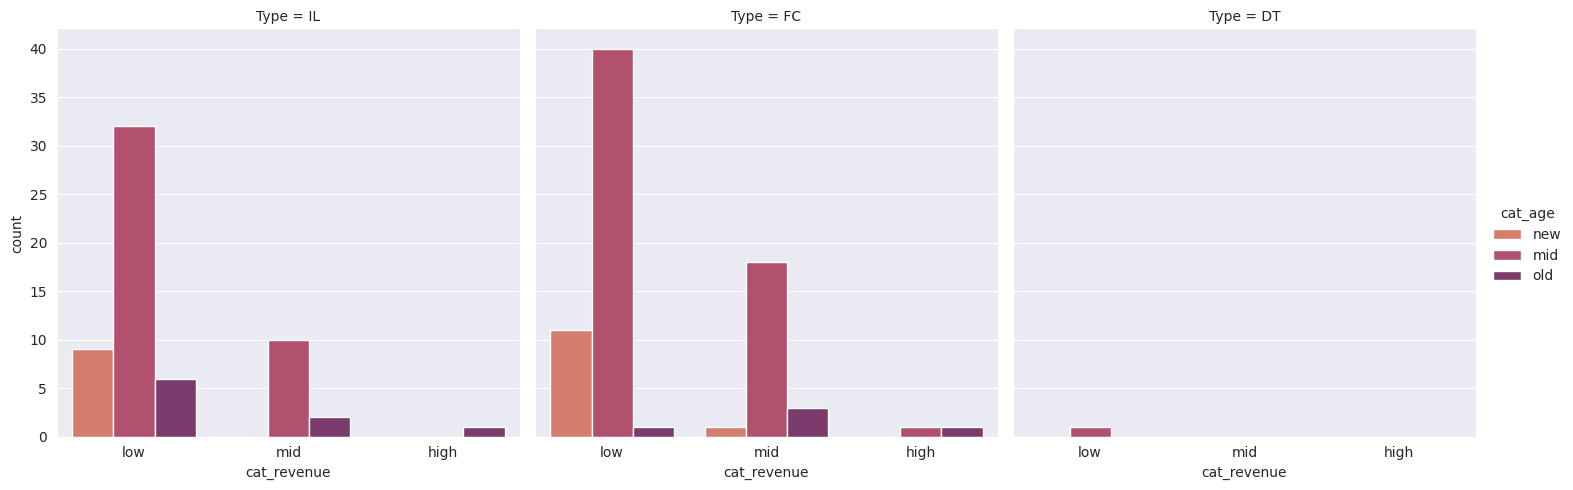

In [ ]:
sns.catplot(data=df_vis, x="cat_revenue", hue="cat_age", col="Type", palette="flare", kind="count")

**results:**

* DT restaurant is not worth.

* FC restaurants is worthy than another.

<h1 id="heading"><center>
RESULTS
<a class="anchor-link" href="https://www.kaggle.com/h0sseinkarami/eda-and-regression-for-restaurant-revenue/notebook#heading">¶</a></center>
</h1>

* restaurants with high revenue are just in big cities.

* DT restaurants are not good at all.

* most of restaurants with high revenue are old and in big cities.

* we could say number of restaurants with mid revenue in mid age and young age, almost equal. maybe for new technologies.

* number of new restaurants in big cities is low against other cities. maybe for High construction costs in big cities.

* total number of FC restaurant is greater than other types of restaurants.

* in both city groups, FC restaurant have more revenue.

* most of restaurants in other city group, have a low revenue. maybe for little pupulation.

* most of restaurants have a mid age in total cities.

* number of new FC restaurants in other cities is much larger than another. maybe for low construction costs.

* number of FC restaurants in other city is bigger than big city, which opposite of another types.

* DT restaurant is not worth.

* FC restaurants is worthy than another.